In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
send_clones_historical = pd.read_csv("by_accesion.csv")

In [4]:
send_clones_historical.columns

Index(['Order Request ID', 'Request Number', 'Crop', 'Consignee Country',
       'State', 'City', 'Accession number', 'DOI', 'Date of Request',
       'Date of Cancelled', 'Date of Distribution', 'Quantity',
       'Form Material', 'Agreement Type', 'Consignee Last Name',
       'Consignee First Name', 'Institution', 'Category of Institution',
       'Distribution to the User', 'Purpose', 'Biological Status',
       'Biological Status CIP', 'Custody in Charge',
       'Genebank Accession Status', 'MLS Status', 'Labcode / LOTID',
       'order_request_item_id', 'Brief description of use of the germplasm',
       'Notes and Comments for the request'],
      dtype='object')

In [5]:
select_col_sch = ['Request Number', 'Crop', 'Consignee Country','Accession number', 'Date of Distribution', 'Quantity',
       'Form Material', 'Institution', 'Category of Institution','Distribution to the User', 'Purpose', 'Biological Status',
       'Biological Status CIP']

In [22]:
send_clones_historical_filter =  send_clones_historical[select_col_sch]

In [24]:
send_clones_historical_filter.to_csv('send_clones.csv', index=False)

In [7]:
varieties_realease = pd.read_csv('Variedades.csv')

In [8]:
varieties_realease.columns

Index(['ORD', 'Accession number', 'Continent', 'Country', 'Accession name',
       'Year of cross ', 'Year of release', 'Unnamed: 7',
       'Corporative Data Base (Clon) ', 'Corporative Data Base(Fam) ',
       'Invitro', 'Population', 'Catalogue', 'Organization'],
      dtype='object')

In [9]:
select_col_vr= ['Accession number', 'Continent', 'Country', 'Accession name',
       'Year of cross ', 'Year of release','Corporative Data Base (Clon) ', 'Corporative Data Base(Fam) ',
       'Invitro', 'Population', 'Catalogue', 'Organization']

In [10]:
varieties_realease = varieties_realease[select_col_vr]

In [11]:
varieties_realease.groupby('Country').size()

Country
Angola          6
Bangladesh     12
Bhutan          1
Bolivia         1
Burundi        10
Cameroon        3
China           1
Colombia        2
Congo           5
Costa Rica      7
Ecuador         2
Ethiopia       17
Georgia         4
Guatemala       1
India           4
Indonesia       3
Kazakhstan      3
Kenya          11
Laos            1
Madagascar      5
Malawi          5
Mozambique      5
Nigeria         4
Panama          4
Peru           31
Philippines     1
Rwanda         20
Tajikistan      3
Tanzania        4
Turkey          1
Uganda         12
Uzbekistan      3
Venezuela       2
Vietnam         2
Zaire           3
dtype: int64

In [12]:
varieties_realease

,Accession number,Continent,Country,Accession name,Year of cross,Year of release,Corporative Data Base (Clon),Corporative Data Base(Fam),Invitro,Population,Catalogue,Organization
0,CIP279139.5,LAC,Peru,Santa Ana,1979,--,YES,YES,YES,NaN,YES,NaN
1,CIP279142.12,LAC,Peru,Maria Huanca,1979,1987,YES,YES,YES,NaN,YES,NaN
2,CIP304371.67,ASIA,Bangladesh,BARI Alu-87,2004,2019,YES,YES,YES,LTVR,NO,NaN
3,CIP370120,ASIA,Indonesia,Fries,1970,2003,YES,YES,YES,---,YES,NaN
4,CIP371056.175,SSA,Angola,Boa Branca,1971,1993,NO,NO,NO,--,NO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
194,CIP398211.35,LAC,Peru,Musuq Tomasa,1998,--,YES,YES,YES,NaN,YES,NaN
195,CIP399049.22,LAC,Peru,Poderosa,1999,2017,YES,YES,YES,B1C5,YES,NaN
196,CIP399062.118,LAC,Peru,Kawsay,1999,2017,YES,YES,YES,B1C5,YES,NaN
197,CIP399075.7,LAC,Peru,Puca Lliclla INIA 312,1999,2007,YES,YES,YES,B1C5,YES,NaN


In [13]:
exito = {}
for country in varieties_realease['Country'].unique():
    successful_varieties = varieties_realease[varieties_realease['Country'] == country]['Accession number'].tolist()
    cleaned_varieties = ['CIP ' + code.split('CIP')[1].strip() if 'CIP' in code else code for code in successful_varieties]
    # Asignar la lista limpia al diccionario de éxito
    exito[country] = cleaned_varieties

In [14]:
exito

{'Peru': ['CIP 279139.5',
  'CIP 279142.12',
  'CIP 374080.1',
  'CIP 374080.5',
  'CIP 376180.6',
  'CIP 377740.2',
  'CIP 377744.1',
  'CIP 377744.2',
  'CIP 379706.27',
  'CIP 379735.1',
  'CIP 379735.3',
  'CIP 380109.30',
  'CIP 380389.1',
  'CIP 380496.6',
  'CIP 384688.2',
  'CIP 384866.5',
  'CIP 386768.10',
  'CIP 387096.2',
  'CIP 388611.22',
  'CIP 388676.1',
  'CIP 390478.9',
  'CIP 391691.96',
  'CIP 392780.1',
  'CIP 392781.1',
  'CIP 392797.22',
  'CIP 393371.58',
  'CIP 398211.35',
  'CIP 399049.22',
  'CIP 399062.118',
  'CIP 399075.7',
  'CIP 399085.23'],
 'Bangladesh': ['CIP 304371.67',
  'CIP 379666.501',
  'CIP 380606.6',
  'CIP 384073.457',
  'CIP 385079.364',
  'CIP 385270.163',
  'CIP 392797.22',
  'CIP 392820.1',
  'CIP 393280.64',
  'CIP 393371.58',
  'CIP 396311.1',
  'CIP 397029.21'],
 'Indonesia': ['CIP 370120', 'CIP 392797.22', 'CIP 397073.16'],
 'Angola': ['CIP 371056.175',
  'CIP 393227.44',
  'CIP 393382.44',
  'CIP 395015.6',
  'CIP 395111.13',
  'CIP 

In [15]:
clones_charaterization = pd.read_csv('clones_caracteristicas.csv')

In [16]:
clones_charaterization.columns

Index(['Ord', 'Accession number', 'Catalogue',
       'Collecting number/Breeder code', 'Accession name', 'Population Group',
       'Parent Female', 'Parent Male', 'Predominant tuber skin color',
       'Tuber skin secondary color',
       'Distribution of secondary tuber skin color',
       'Predominant tuber flesh color', 'Tuber flesh secondary color',
       'Distribution of secondary flesh color', 'General tuber shape',
       'Unusual tuber shape', 'Tuber shape depth of eyes', 'Late blight (LB)',
       'Potato virus X (PVX)', 'Potato virus Y (PVY)',
       'Potato leaf roll virus (PLRV)', 'Bacterial wilt (BW)',
       'Root knot nematode (RKN)', 'Leaf miner fly (LMF)',
       'Tuber yield (Kg/plants)', 'Tuber yield (Tn/Ha)',
       'Dormancy period - DLS lowland', 'Dormancy period - DLS highland',
       'Growing period lowland', 'Growing period highland', 'Dry matter (%)',
       'Oil absorption rate (%)', 'Chipping color', 'French fries',
       'Cooking quality', 'Cooking tim

In [17]:
columnas_vacias = clones_charaterization.columns[clones_charaterization.isnull().all()].tolist()

In [18]:
#clones_charaterization = clones_charaterization.dropna(axis=1, how='all')
umbral = 0.2
porcentaje_nulos = clones_charaterization.isnull().mean()
columnas_a_eliminar = porcentaje_nulos[porcentaje_nulos > umbral].index
clones_charaterization_f = clones_charaterization.drop(columns=columnas_a_eliminar)

In [19]:
clones_charaterization_f.columns

Index(['Ord', 'Accession number', 'Catalogue', 'Population Group',
       'Parent Female', 'Parent Male', 'Predominant tuber skin color',
       'Tuber skin secondary color',
       'Distribution of secondary tuber skin color',
       'Predominant tuber flesh color', 'Tuber flesh secondary color',
       'Distribution of secondary flesh color', 'General tuber shape',
       'Unusual tuber shape', 'Tuber shape depth of eyes', 'Late blight (LB)',
       'Potato virus Y (PVY)', 'Tuber yield (Kg/plants)', 'Dry matter (%)',
       'Chipping color', 'Adaptability'],
      dtype='object')

In [21]:
clones_charaterization_f.to_csv('clones_characteristics.csv', index=False)

In [262]:
#send_clones_historical_filter.columns
send_clones_historical_filter.groupby('Accession number').size()

Accession number
CIP 278072.10     23
CIP 278096.10      5
CIP 279023.137     6
CIP 279023.34     10
CIP 279023.68     11
                  ..
CIP 814004.6       1
CIP 814004.8       1
CIP 819001.1       3
CIP 819002.14      6
CIP 819002.6       7
Length: 3292, dtype: int64

In [263]:
send_clones_historical_filter[['CIP', 'Family', 'Clone']] = send_clones_historical_filter['Accession number'].str.extract(r' ?(CIP) ?(\d+)(?:\.(\d+))?')

/tmp/ipykernel_7849/2752259929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  send_clones_historical_filter[['CIP', 'Family', 'Clone']] = send_clones_historical_filter['Accession number'].str.extract(r' ?(CIP) ?(\d+)(?:\.(\d+))?')
/tmp/ipykernel_7849/2752259929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  send_clones_historical_filter[['CIP', 'Family', 'Clone']] = send_clones_historical_filter['Accession number'].str.extract(r' ?(CIP) ?(\d+)(?:\.(\d+))?')
/tmp/ipykernel_7849/2752259929.py:1: Set

In [264]:
print(send_clones_historical_filter.groupby('Quantity').size())
print(send_clones_historical_filter.groupby('Form Material').size())
print(send_clones_historical_filter.groupby('Category of Institution').size())
print(send_clones_historical_filter.groupby('Distribution to the User').size())
print(send_clones_historical_filter.groupby('Purpose').size())
print(send_clones_historical_filter.groupby('Biological Status').size())
print(send_clones_historical_filter.groupby('Biological Status CIP').size())

Quantity
1         97
2       4096
3        329
4       7515
5       1264
        ... 
540        2
600        5
800        8
1000       1
1500       7
Length: 64, dtype: int64
Form Material
In-vitro    21839
Seed          771
dtype: int64
Category of Institution
Advance research Institute (ARI)        332
CGIAR Centers                         10781
CIP Genebank                            560
Commercial Sector                       442
Farmer                                   11
Individual/Unknown                      226
International Genebank                   61
National Agric. Research (NARS)        7853
No Governmental Organization (NGO)      326
University                             2013
dtype: int64
Distribution to the User
External, International                     10338
External, National                            838
Internal, CIPHQ Breeders and Researchers     9509
Internal, International                      1904
Internal, National (CIP Stations)              21
dtype: i

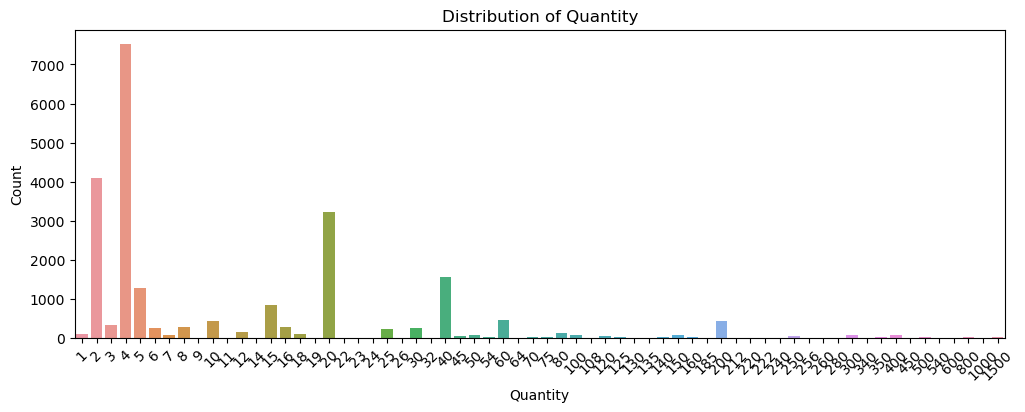

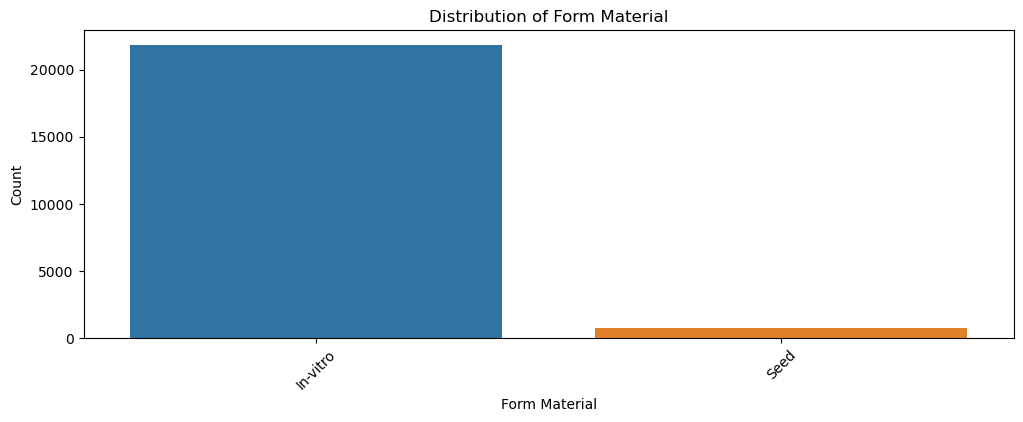

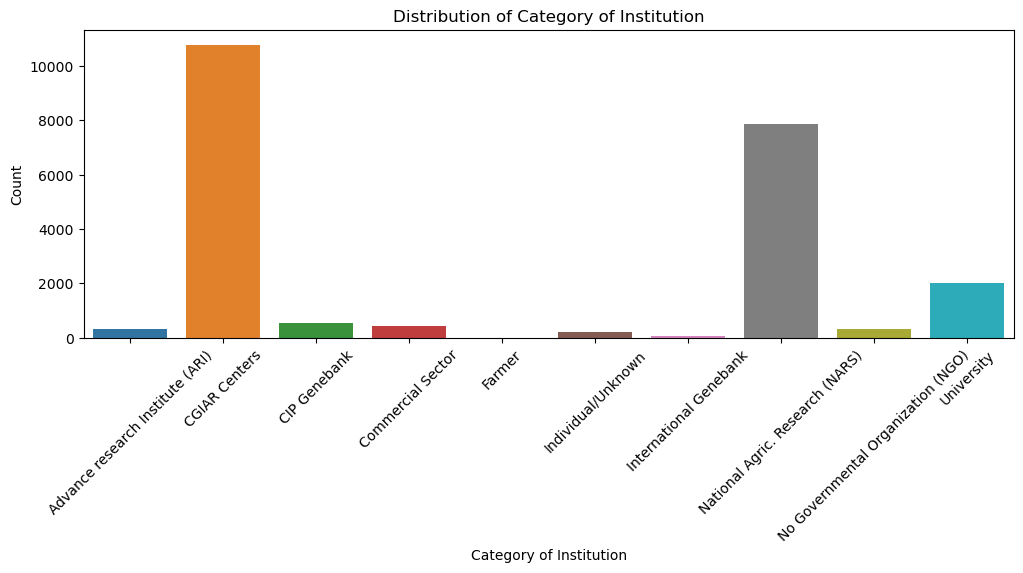

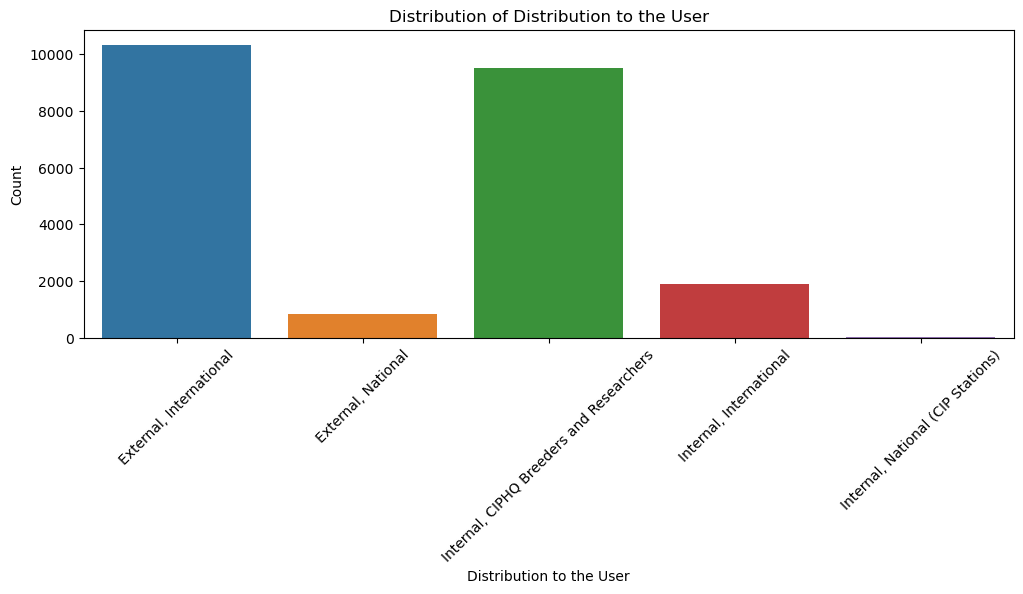

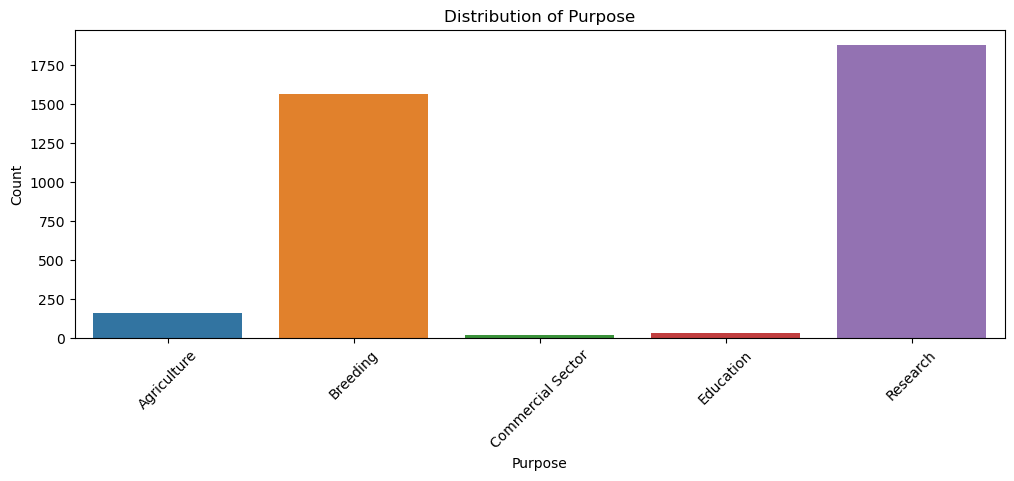

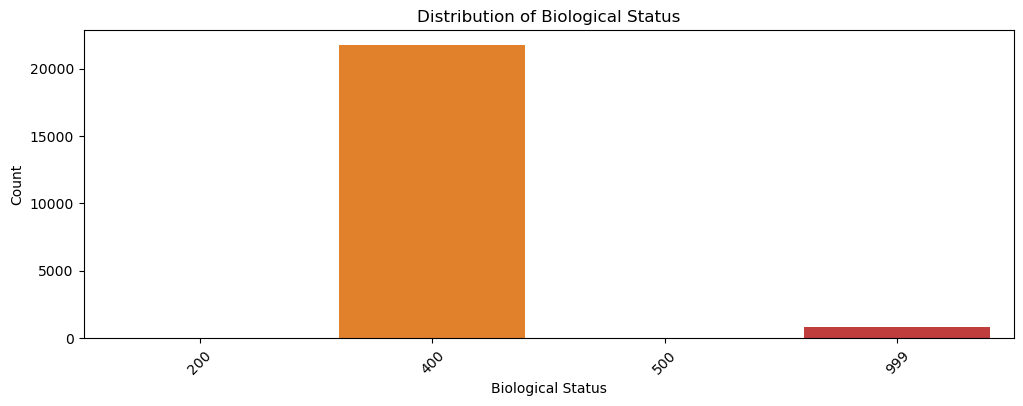

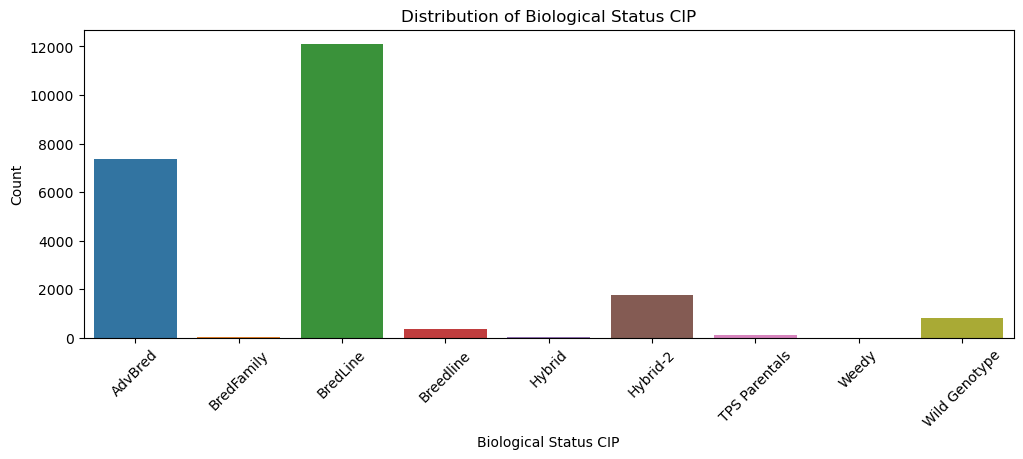

In [265]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que send_clones_historical_filter es un DataFrame de pandas ya cargado con los datos necesarios

# Función para crear y mostrar gráficos de barras
def plot_grouped_data(dataframe, column_name):
    grouped_data = dataframe.groupby(column_name).size().reset_index(name='Count')
    plt.figure(figsize=(12, 4))
    sns.barplot(x=column_name, y='Count', data=grouped_data)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {column_name}')
    plt.show()

# Lista de las columnas a graficar
columns = [
    'Quantity',
    'Form Material',
    'Category of Institution',
    'Distribution to the User',
    'Purpose',
    'Biological Status',
    'Biological Status CIP'
]

# Graficando cada columna
for column in columns:
    plot_grouped_data(send_clones_historical_filter, column)


In [266]:
send_clones_historical_filter

,Request Number,Crop,Consignee Country,Accession number,Date of Distribution,Quantity,Form Material,Institution,Category of Institution,Distribution to the User,Purpose,Biological Status,Biological Status CIP,CIP,Family,Clone
0,1989172,Potato,Rwanda,CIP 800990,23/01/1990,2,In-vitro,PNAP - ISAR,National Agric. Research (NARS),"External, International",NaN,400,BredLine,CIP,800990,NaN
1,1990004,Potato,Canada,CIP 384111.23,23/01/1990,200,Seed,PROGEST,Commercial Sector,"Internal, International",NaN,400,BredLine,CIP,384111,23
2,1990004,Potato,Canada,CIP 384142.25,23/01/1990,200,Seed,PROGEST,Commercial Sector,"Internal, International",NaN,400,BredLine,CIP,384142,25
3,1990004,Potato,Canada,CIP 385058.17,23/01/1990,200,Seed,PROGEST,Commercial Sector,"Internal, International",NaN,400,BredLine,CIP,385058,17
4,1990004,Potato,Canada,CIP 389429.31,23/01/1990,200,Seed,PROGEST,Commercial Sector,"Internal, International",NaN,400,AdvBred,CIP,389429,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22605,2023124,Potato,Peru,CIP 398017.53,20/11/2023,10,In-vitro,International Potato Center - CIP,CGIAR Centers,"Internal, CIPHQ Breeders and Researchers",Breeding,400,AdvBred,CIP,398017,53
22606,2023124,Potato,Peru,CIP 398180.289,20/11/2023,10,In-vitro,International Potato Center - CIP,CGIAR Centers,"Internal, CIPHQ Breeders and Researchers",Breeding,400,AdvBred,CIP,398180,289
22607,2023124,Potato,Peru,CIP 398208.219,20/11/2023,10,In-vitro,International Potato Center - CIP,CGIAR Centers,"Internal, CIPHQ Breeders and Researchers",Breeding,400,AdvBred,CIP,398208,219
22608,2023127,Potato,Peru,CIP 312721.245,12/12/2023,200,In-vitro,International Potato Center - CIP,CGIAR Centers,"Internal, CIPHQ Breeders and Researchers",Breeding,400,BredLine,CIP,312721,245


In [267]:
print(send_clones_historical_filter.groupby('Family').size())
df = send_clones_historical_filter

Family
278072    23
278096     5
279023    27
280054     9
280090    20
          ..
814002     1
814003     1
814004     3
819001     3
819002    13
Length: 1394, dtype: int64


In [272]:
df['Exito'] = df.apply(lambda row: row['Accession number'] in exito.get(row['Consignee Country'], []), axis=1)

columns = [
    'Quantity',
    'Form Material',
    'Category of Institution',
    'Distribution to the User',
    'Purpose',
    'Biological Status',
    'Biological Status CIP'
]

# Calcular un score basado en varios factores (ejemplo simple)
def calcular_score(row):
    score = 0
    if row['Exito']:
        score += 10
    score += row['Quantity'] / 100
    
    if row['Form Material'] == 'seed':
        score += 2
    else:
        score += 1
        
    if row['Purpose'] == 'Commercial Sector':
        score += 5
    elif row['Purpose'] == 'Agriculture':
        score += 4
    elif row['Purpose'] == 'Breeding':
        score += 3
    else:
        score += 1

    return score

# Aplicar la función de score a cada fila del DataFrame
df['Score'] = df.apply(calcular_score, axis=1)

# Crear una tabla de puntuación agregada por combinación de Numero1 y Consignee Country
score_table = df.pivot_table(index='Family', columns='Consignee Country', values='Score', aggfunc='sum', fill_value=0)

# Mostrar la tabla de puntuación
print(score_table)

/tmp/ipykernel_7849/2231121272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Exito'] = df.apply(lambda row: row['Accession number'] in exito.get(row['Consignee Country'], []), axis=1)
/tmp/ipykernel_7849/2231121272.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Score'] = df.apply(calcular_score, axis=1)


Consignee Country  Afghanistan  Algeria  Angola  Argentina  Armenia  \
Family                                                                
278072                     0.0      0.0     0.0        0.0      0.0   
278096                     0.0      0.0     0.0        0.0      0.0   
279023                     0.0      0.0     0.0        0.0      0.0   
280054                     0.0      0.0     0.0        0.0      0.0   
280090                     0.0      0.0     0.0        0.0      0.0   
...                        ...      ...     ...        ...      ...   
814002                     0.0      0.0     0.0        0.0      0.0   
814003                     0.0      0.0     0.0        0.0      0.0   
814004                     0.0      0.0     0.0        0.0      0.0   
819001                     0.0      0.0     0.0        0.0      0.0   
819002                     0.0      0.0     0.0        0.0      0.0   

Consignee Country  Australia  Austria  Bahamas  Bangladesh  Belarus  ...  \


In [273]:
df.groupby('Exito').size()
exito

{'Peru': ['CIP 279139.5',
  'CIP 279142.12',
  'CIP 374080.1',
  'CIP 374080.5',
  'CIP 376180.6',
  'CIP 377740.2',
  'CIP 377744.1',
  'CIP 377744.2',
  'CIP 379706.27',
  'CIP 379735.1',
  'CIP 379735.3',
  'CIP 380109.30',
  'CIP 380389.1',
  'CIP 380496.6',
  'CIP 384688.2',
  'CIP 384866.5',
  'CIP 386768.10',
  'CIP 387096.2',
  'CIP 388611.22',
  'CIP 388676.1',
  'CIP 390478.9',
  'CIP 391691.96',
  'CIP 392780.1',
  'CIP 392781.1',
  'CIP 392797.22',
  'CIP 393371.58',
  'CIP 398211.35',
  'CIP 399049.22',
  'CIP 399062.118',
  'CIP 399075.7',
  'CIP 399085.23'],
 'Bangladesh': ['CIP 304371.67',
  'CIP 379666.501',
  'CIP 380606.6',
  'CIP 384073.457',
  'CIP 385079.364',
  'CIP 385270.163',
  'CIP 392797.22',
  'CIP 392820.1',
  'CIP 393280.64',
  'CIP 393371.58',
  'CIP 396311.1',
  'CIP 397029.21'],
 'Indonesia': ['CIP 370120', 'CIP 392797.22', 'CIP 397073.16'],
 'Angola': ['CIP 371056.175',
  'CIP 393227.44',
  'CIP 393382.44',
  'CIP 395015.6',
  'CIP 395111.13',
  'CIP 

/home/fascue/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


3.2591851918417896


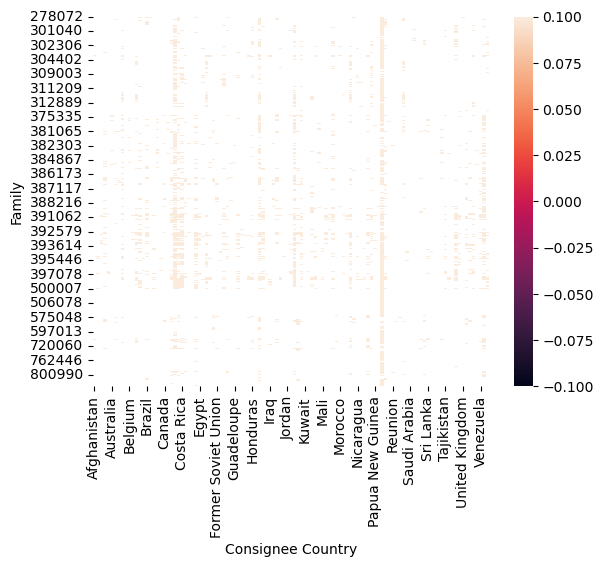

In [316]:
log_score_table = np.log10(score_table)
max_value = np.max(log_score_table)
print(max_value)
sns.heatmap(log_score_table)
plt.show()

In [275]:
send_clones_historical_filter

,Request Number,Crop,Consignee Country,Accession number,Date of Distribution,Quantity,Form Material,Institution,Category of Institution,Distribution to the User,Purpose,Biological Status,Biological Status CIP,CIP,Family,Clone,Exito,Score
0,1989172,Potato,Rwanda,CIP 800990,23/01/1990,2,In-vitro,PNAP - ISAR,National Agric. Research (NARS),"External, International",NaN,400,BredLine,CIP,800990,NaN,False,2.02
1,1990004,Potato,Canada,CIP 384111.23,23/01/1990,200,Seed,PROGEST,Commercial Sector,"Internal, International",NaN,400,BredLine,CIP,384111,23,False,4.00
2,1990004,Potato,Canada,CIP 384142.25,23/01/1990,200,Seed,PROGEST,Commercial Sector,"Internal, International",NaN,400,BredLine,CIP,384142,25,False,4.00
3,1990004,Potato,Canada,CIP 385058.17,23/01/1990,200,Seed,PROGEST,Commercial Sector,"Internal, International",NaN,400,BredLine,CIP,385058,17,False,4.00
4,1990004,Potato,Canada,CIP 389429.31,23/01/1990,200,Seed,PROGEST,Commercial Sector,"Internal, International",NaN,400,AdvBred,CIP,389429,31,False,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22605,2023124,Potato,Peru,CIP 398017.53,20/11/2023,10,In-vitro,International Potato Center - CIP,CGIAR Centers,"Internal, CIPHQ Breeders and Researchers",Breeding,400,AdvBred,CIP,398017,53,False,4.10
22606,2023124,Potato,Peru,CIP 398180.289,20/11/2023,10,In-vitro,International Potato Center - CIP,CGIAR Centers,"Internal, CIPHQ Breeders and Researchers",Breeding,400,AdvBred,CIP,398180,289,False,4.10
22607,2023124,Potato,Peru,CIP 398208.219,20/11/2023,10,In-vitro,International Potato Center - CIP,CGIAR Centers,"Internal, CIPHQ Breeders and Researchers",Breeding,400,AdvBred,CIP,398208,219,False,4.10
22608,2023127,Potato,Peru,CIP 312721.245,12/12/2023,200,In-vitro,International Potato Center - CIP,CGIAR Centers,"Internal, CIPHQ Breeders and Researchers",Breeding,400,BredLine,CIP,312721,245,False,6.00


In [276]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
#send_clones_historical_filter = pd.DataFrame(send_clones_historical_filter)

contingency_table = pd.crosstab(send_clones_historical_filter['Family'], 
                                                           send_clones_historical_filter['Consignee Country'], dropna=False)

In [293]:
contingency_table
log_contingency_table = np.log10(contingency_table)
max_value = np.max(contingency_table)
print(max_value)

771


In [295]:
contingency_table_ad = contingency_table/100

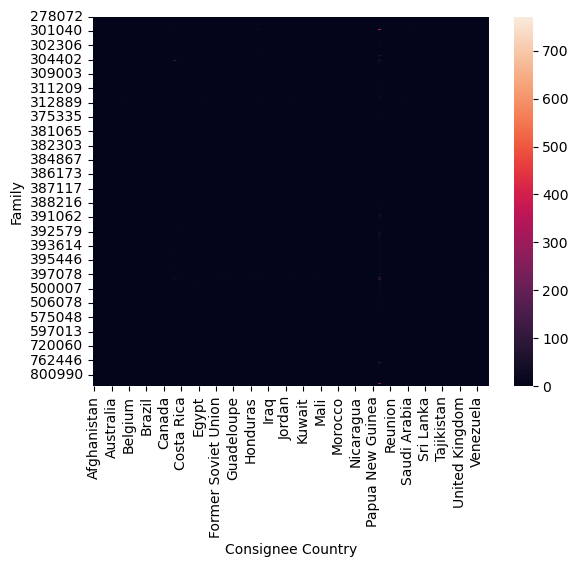

In [291]:
sns.heatmap(contingency_table)
plt.show()

In [279]:
dense_matrix = sparse_matrix.toarray()
dense_df = pd.DataFrame(dense_matrix)

In [280]:
dense_df

,0,1,2,3,4,5,6,7,8,9,...,103,104,105,106,107,108,109,110,111,112
0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.8
1,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
assert dense_df.shape == log_contingency_table.shape, "Las dimensiones de los DataFrames no coinciden"
  

AssertionError: Las dimensiones de los DataFrames no coinciden

In [281]:
log_score_table
log_score_table = log_score_table.fillna(log_score_table.mean())
log_score_table

Consignee Country,Afghanistan,Algeria,Angola,Argentina,Armenia,Australia,Austria,Bahamas,Bangladesh,Belarus,...,Turkey,Uganda,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Zimbabwe
Family,,,,,,,,,,,,,,,,,,,,,
278072,-inf,-inf,-inf,-inf,-inf,-inf,0.305351,0.305351,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.782473,-inf,0.907411
278096,-inf,-inf,-inf,-inf,-inf,-inf,0.305351,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
279023,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,0.606381,-inf,-inf,-inf,-inf,-inf,-inf,0.781037
280054,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,0.305351,-inf,-inf,-inf,-inf,-inf,-inf,-inf
280090,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,0.305351,-inf,-inf,-inf,-inf,-inf,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814002,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
814003,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
814004,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf


In [178]:
df_sum = log_score_table + log_contingency_table

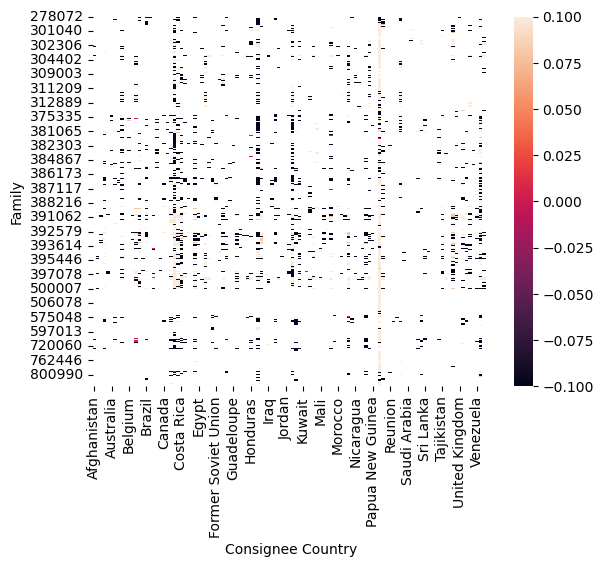

In [179]:
sns.heatmap(df_sum)
plt.show()

In [282]:
df_sum

Consignee Country,Afghanistan,Algeria,Angola,Argentina,Armenia,Australia,Austria,Bahamas,Bangladesh,Belarus,...,Uganda,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Zimbabwe,NaN
Family,,,,,,,,,,,,,,,,,,,,,
278072,-inf,-inf,-inf,-inf,-inf,-inf,-0.69897,-0.69897,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,0.255273,-inf,0.20412,NaN
278096,-inf,-inf,-inf,-inf,-inf,-inf,-0.69897,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,NaN
279023,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-0.09691,-inf,-inf,-inf,-inf,-inf,-inf,-0.39794,NaN
280054,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-0.69897,-inf,-inf,-inf,-inf,-inf,-inf,-inf,NaN
280090,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-0.69897,-inf,-inf,-inf,-inf,-inf,-inf,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814002,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,NaN
814003,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,NaN
814004,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,NaN


In [296]:
user_ratings_mean = np.nanmean(df_sum, axis=1)

# Restar la media de cada usuario a las calificaciones
R_demeaned = (df_sum.T - user_ratings_mean).T
R_demeaned = R_demeaned.fillna(0)  # Reemplaza los NaN por

In [305]:
tmp = contingency_table_ad + score_table/100

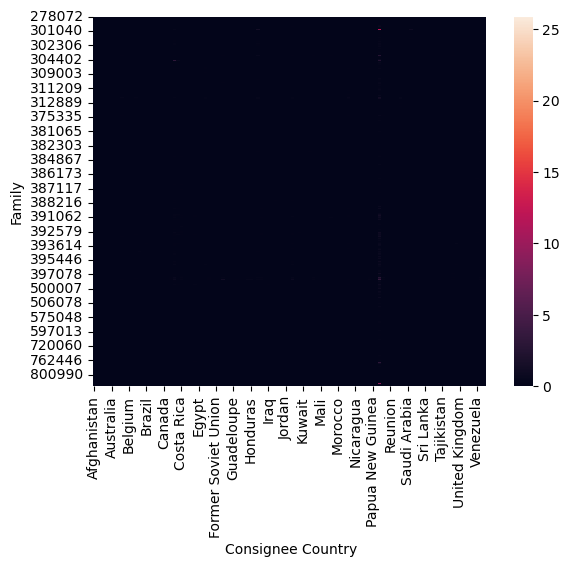

In [306]:
sns.heatmap(tmp)
plt.show()

In [284]:
import numpy as np
import pandas as pd

index_names = score_table.index  # Nombres de filas
column_names = score_table.columns  # Nombres de columnas

# Manejo de valores faltantes (rellenar con la media)
df_filled = score_table.fillna(score_table.mean())

matrix = df_filled.values.astype(float)
mean = np.mean(matrix, axis=0)
std_dev = np.std(matrix, axis=0)
R_normalized = (matrix - mean) / std_dev

# Aplicar SVD
try:
    U, sigma, VT = np.linalg.svd(R_normalized, full_matrices=False)
    print("SVD exitoso!")

    # Convertir sigma a una matriz diagonal
    sigma_matrix = np.diag(sigma)

    # Reconstruir aproximadamente la matriz original
    reconstructed_matrix = U @ sigma_matrix @ VT

    # Reconstruir DataFrame original aproximadamente
    reconstructed_df = pd.DataFrame(reconstructed_matrix, index=index_names, columns=column_names)

    print("\nDataFrame reconstruido:")
    print(reconstructed_df)

except np.linalg.LinAlgError as e:
    print("Error en SVD:", e)
except np.linalg.LinAlgError as e:
    print("Error en SVD:", e)



SVD exitoso!

DataFrame reconstruido:
Consignee Country  Afghanistan   Algeria    Angola  Argentina   Armenia  \
Family                                                                    
278072                -0.10227 -0.097023 -0.079555  -0.279616 -0.084784   
278096                -0.10227 -0.097023 -0.079555  -0.279616 -0.084784   
279023                -0.10227 -0.097023 -0.079555  -0.279616 -0.084784   
280054                -0.10227 -0.097023 -0.079555  -0.279616 -0.084784   
280090                -0.10227 -0.097023 -0.079555  -0.279616 -0.084784   
...                        ...       ...       ...        ...       ...   
814002                -0.10227 -0.097023 -0.079555  -0.279616 -0.084784   
814003                -0.10227 -0.097023 -0.079555  -0.279616 -0.084784   
814004                -0.10227 -0.097023 -0.079555  -0.279616 -0.084784   
819001                -0.10227 -0.097023 -0.079555  -0.279616 -0.084784   
819002                -0.10227 -0.097023 -0.079555  -0.279616 

In [285]:
reconstructed_df

Consignee Country,Afghanistan,Algeria,Angola,Argentina,Armenia,Australia,Austria,Bahamas,Bangladesh,Belarus,...,Turkey,Uganda,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Zimbabwe
Family,,,,,,,,,,,,,,,,,,,,,
278072,-0.10227,-0.097023,-0.079555,-0.279616,-0.084784,-0.105657,4.575999,12.407194,-0.234442,-0.107858,...,-0.346436,-0.122957,-0.090420,-0.256086,-0.220944,-0.219471,-0.058564,4.319081,-0.445904,4.883991
278096,-0.10227,-0.097023,-0.079555,-0.279616,-0.084784,-0.105657,4.575999,-0.062617,-0.234442,-0.107858,...,-0.346436,-0.122957,-0.090420,-0.256086,-0.220944,-0.219471,-0.058564,-0.165520,-0.445904,-0.214297
279023,-0.10227,-0.097023,-0.079555,-0.279616,-0.084784,-0.105657,-0.153827,-0.062617,-0.234442,-0.107858,...,-0.346436,-0.122957,18.910458,-0.256086,-0.220944,-0.219471,-0.058564,-0.165520,-0.445904,3.596800
280054,-0.10227,-0.097023,-0.079555,-0.279616,-0.084784,-0.105657,-0.153827,-0.062617,-0.234442,-0.107858,...,-0.346436,-0.122957,9.410019,-0.256086,-0.220944,-0.219471,-0.058564,-0.165520,-0.445904,-0.214297
280090,-0.10227,-0.097023,-0.079555,-0.279616,-0.084784,-0.105657,-0.153827,-0.062617,-0.234442,-0.107858,...,-0.346436,-0.122957,-0.090420,1.752964,-0.220944,-0.219471,-0.058564,-0.165520,-0.445904,-0.214297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814002,-0.10227,-0.097023,-0.079555,-0.279616,-0.084784,-0.105657,-0.153827,-0.062617,-0.234442,-0.107858,...,-0.346436,-0.122957,-0.090420,-0.256086,-0.220944,-0.219471,-0.058564,-0.165520,-0.445904,-0.214297
814003,-0.10227,-0.097023,-0.079555,-0.279616,-0.084784,-0.105657,-0.153827,-0.062617,-0.234442,-0.107858,...,-0.346436,-0.122957,-0.090420,-0.256086,-0.220944,-0.219471,-0.058564,-0.165520,-0.445904,-0.214297
814004,-0.10227,-0.097023,-0.079555,-0.279616,-0.084784,-0.105657,-0.153827,-0.062617,-0.234442,-0.107858,...,-0.346436,-0.122957,-0.090420,-0.256086,-0.220944,-0.219471,-0.058564,-0.165520,-0.445904,-0.214297


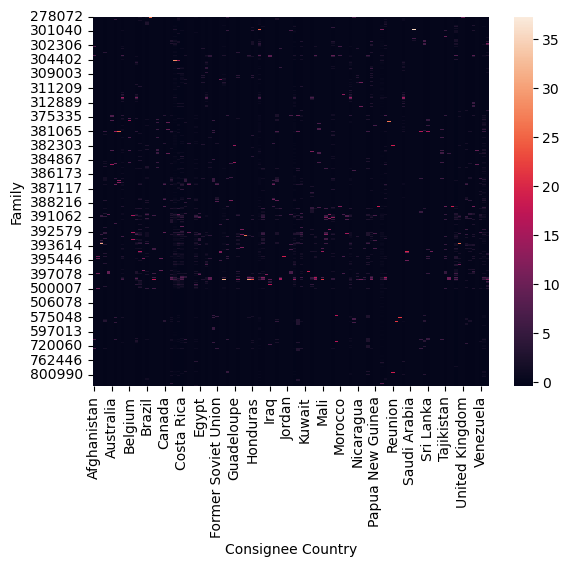

In [286]:
sns.heatmap(reconstructed_df)
plt.show()

In [287]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcular la similitud entre ítems (por ejemplo, columnas en tu DataFrame)
item_similarity = cosine_similarity(reconstructed_df.T)


In [288]:
item_similarity

array([[ 1.        ,  0.10225122, -0.00813606, ..., -0.00878914,
         0.08431923,  0.15156421],
       [ 0.10225122,  1.        ,  0.03187939, ...,  0.04756682,
         0.09823027,  0.09900961],
       [-0.00813606,  0.03187939,  1.        , ...,  0.10360979,
         0.06016729, -0.01214915],
       ...,
       [-0.00878914,  0.04756682,  0.10360979, ...,  1.        ,
         0.13389542,  0.04162552],
       [ 0.08431923,  0.09823027,  0.06016729, ...,  0.13389542,
         1.        ,  0.2263539 ],
       [ 0.15156421,  0.09900961, -0.01214915, ...,  0.04162552,
         0.2263539 ,  1.        ]])

In [314]:
def get_recommendations(column_name, item_similarity, reconstructed_df, top_n=5):
    # Obtener el índice de la columna específica
    column_idx = reconstructed_df.columns.get_loc(column_name)
    
    # Calcular las similitudes con otras columnas (ítems)
    column_similarities = item_similarity[column_idx]
    
    # Obtener los índices de las columnas más similares (excluyendo la propia columna)
    similar_indices = column_similarities.argsort()[::-1][1:top_n+1]
    
    # Obtener nombres de filas (en este caso, son los índices) recomendados
    recommended_rows = reconstructed_df.index[similar_indices]
    
    return recommended_rows

# Ejemplo de recomendaciones para un ítem específico
item_name = 'United States'
recommended_items = get_recommendations(item_name, item_similarity, reconstructed_df)
print(f"Recomendaciones para {item_name}: {recommended_items}")

Recomendaciones para United States: Index(['301026', '300055', '301023', '285424', '288771'], dtype='object', name='Family')
